In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# データセットの準備
dataset = tf.keras.datasets.boston_housing
train, test = dataset.load_data()

In [3]:
# 学習用データセット
train

(array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
         3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.75520e+02, 3.26000e+00],
        ...,
        [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
         3.62250e+02, 7.83000e+00],
        [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         2.61950e+02, 1.57900e+01],
        [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
         3.76700e+02, 4.38000e+00]]),
 array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
        17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
        32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
        23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
        12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
   

In [4]:
# テスト用データセット
test

(array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         2.72500e+01, 2.90500e+01],
        [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
         3.94950e+02, 1.62100e+01],
        [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
         3.96900e+02, 9.74000e+00],
        ...,
        [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         3.89610e+02, 1.92000e+00],
        [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
         3.91700e+02, 9.71000e+00],
        [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         2.40160e+02, 9.81000e+00]]),
 array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
        14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
        20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
        23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
        32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
   

In [5]:
# サンプル数
train[0].shape, test[0].shape

((404, 13), (102, 13))

In [6]:
# 学習用データセット
x_train = np.array(train[0], np.float32)
t_train = np.array(train[1], np.int32)

# テスト用データセット
x_test = np.array(test[0], np.float32)
t_test = np.array(test[1], np.uint32)

In [7]:
x_train.dtype, x_train.shape

(dtype('float32'), (404, 13))

In [8]:
x_test.dtype, x_test.shape

(dtype('float32'), (102, 13))

In [9]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [10]:
# シードの固定
reset_seed(0)

# モデルの定義
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(13, )),
    tf.keras.layers.Dense(1),
])

# モデルのコンパイル
model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae'])

In [11]:
# モデル構造の確認
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


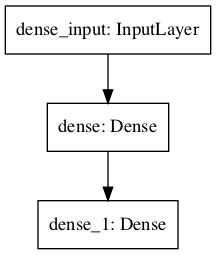

In [12]:
# モデル構造の可視化
tf.keras.utils.plot_model(model)

In [13]:
# モデルの学習
history = model.fit(x_train, t_train, 
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_test, t_test))

Epoch 1/30
13/13 [==============================] - 0s 10ms/step - loss: 21222.6855 - mae: 138.6180 - val_loss: 13315.3262 - val_mae: 108.2218
Epoch 2/30
13/13 [==============================] - 0s 2ms/step - loss: 8216.6748 - mae: 82.8000 - val_loss: 4070.0105 - val_mae: 55.7379
Epoch 3/30
13/13 [==============================] - 0s 2ms/step - loss: 2241.2576 - mae: 39.3423 - val_loss: 985.7280 - val_mae: 25.3244
Epoch 4/30
13/13 [==============================] - 0s 2ms/step - loss: 606.8350 - mae: 20.6313 - val_loss: 499.1852 - val_mae: 19.3275
Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: 440.2765 - mae: 17.9603 - val_loss: 451.2462 - val_mae: 17.8600
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 382.6569 - mae: 16.4839 - val_loss: 366.1032 - val_mae: 16.0113
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: 305.7506 - mae: 14.8693 - val_loss: 290.7780 - val_mae: 14.2709
Epoch 8/30
13/13 [====================

In [14]:
# 学習済みモデルの評価
score = model.evaluate(x_test, t_test)
score

4/4 [==============================] - 0s 679us/step - loss: 62.3124 - mae: 6.1154


[62.312442779541016, 6.11537504196167]

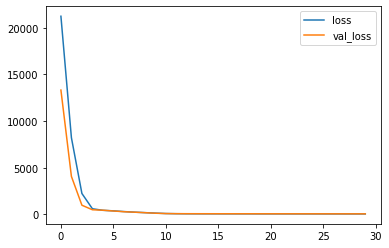

In [15]:
# 結果の可視化
result = pd.DataFrame(history.history)

# 目的関数の可視化
result[['loss', 'val_loss']].plot();

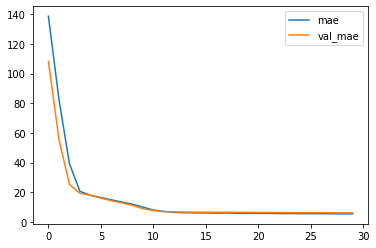

In [16]:
# 評価指標の可視化
result[['mae', 'val_mae']].plot();

誤差修正

In [17]:
# シードの固定
reset_seed(0)

# モデルの構築
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# モデルのコンパイル
model.compile(optimizer='sgd',
               loss='mse',
               metrics=['mae'])

# モデルの学習
history = model.fit(x_train, t_train, 
                    epochs=60,
                    batch_size=32,
                    validation_data=(x_test, t_test))

Epoch 1/60
13/13 [==============================] - 0s 7ms/step - loss: 141.0828 - mae: 8.5428 - val_loss: 1653.7751 - val_mae: 38.8502
Epoch 2/60
13/13 [==============================] - 0s 2ms/step - loss: 75.5330 - mae: 6.5355 - val_loss: 1288.7847 - val_mae: 34.9145
Epoch 3/60
13/13 [==============================] - 0s 2ms/step - loss: 44.0089 - mae: 4.7085 - val_loss: 144.7713 - val_mae: 10.3344
Epoch 4/60
13/13 [==============================] - 0s 3ms/step - loss: 58.6018 - mae: 5.6790 - val_loss: 330.0814 - val_mae: 16.7144
Epoch 5/60
13/13 [==============================] - 0s 2ms/step - loss: 43.8203 - mae: 4.6556 - val_loss: 92.9904 - val_mae: 7.7848
Epoch 6/60
13/13 [==============================] - 0s 2ms/step - loss: 36.0219 - mae: 4.0516 - val_loss: 291.7710 - val_mae: 15.7860
Epoch 7/60
13/13 [==============================] - 0s 2ms/step - loss: 39.4791 - mae: 4.4449 - val_loss: 53.0943 - val_mae: 5.5363
Epoch 8/60
13/13 [==============================] - 0s 3ms/step

In [18]:
# 学習済みモデルの評価
score = model.evaluate(x_test, t_test)
score

4/4 [==============================] - 0s 739us/step - loss: 29.8518 - mae: 4.1157


[29.85184097290039, 4.115668296813965]

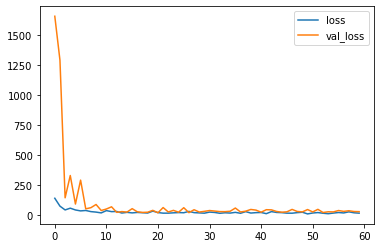

In [19]:
# 結果の可視化
result = pd.DataFrame(history.history)

# 目的関数の可視化
result[['loss', 'val_loss']].plot();

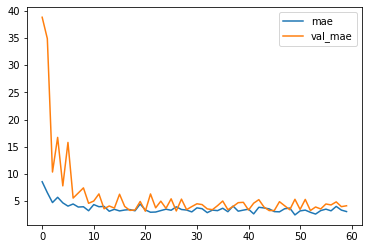

In [20]:
# 評価指標の可視化
result[['mae', 'val_mae']].plot();